In [1]:
import matplotlib
import seaborn
import matplotlib.pyplot as plt

matplotlib.rc('xtick', labelsize=12) 
matplotlib.rc('ytick', labelsize=12) 
matplotlib.rc('legend', fontsize=12)
matplotlib.rc('axes', labelsize=12, titlesize=14)

In [2]:
COLOR_SEQUENCE1 = ['#1f77b4', '#2ca02c', '#7570b3', '#7f7f7f']
COLOR_SEQUENCE2 = ['#1b9e77', '#d95f02', '#7570b3', '#e6ab02', '#e7298a', '#66a61e', '#a6761d', '#666666']
DEFAULT_COLORS = COLOR_SEQUENCE1 + COLOR_SEQUENCE2

In [3]:
i=0
colors = DEFAULT_COLORS[i:] + DEFAULT_COLORS[:i]

seaborn.set_palette(
    seaborn.color_palette(colors, len(colors))
)

In [4]:
from importlib import reload
import data
import plot
import tools
import configs
import predictions

import data; data=reload(data); from data import *
import plot; plot=reload(plot); from plot import *
import tools; tools=reload(tools); from tools import *
import configs; configs=reload(configs); from configs import *
import predictions; predictions=reload(predictions); from predictions import *

C:\Users\basil\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\basil\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [5]:
SAVE = True
SAVE_PATH = 'saved_data/'
R_FIGS_SAVE_PATH = 'be_figs/'

# Load real rates and breakevens

In [6]:
# could configure this to load from saved, to save time on unzipping UK data
# breakevens aren't used

In [7]:
## Load data

In [8]:
us_be, us_r, us_tips_raw = load_us_tips(save=SAVE, save_path=SAVE_PATH)

In [9]:
us_be_daily, us_r_daily, _ = load_us_tips(save=False, freq='D', end='2023')

In [10]:
uk_raw_r, uk_r = load_uk(url=UK_TIPS_URL, uk_data_save_path=UK_DATA_SAVE_PATH, end=END,
                         filename_k='GLC Real daily', sheetname_k='4.  real spot curve', save_name='r',
                         save=SAVE, save_path=SAVE_PATH)

In [11]:
uk_raw_be, uk_be = load_uk(url=UK_BE_URL, uk_data_save_path=UK_DATA_SAVE_PATH, end=END,
                           filename_k='GLC Inflation daily', sheetname_k='4.  inf spot curve', save_name='be',
                           save=SAVE, save_path=SAVE_PATH)

In [12]:
manual_rs_by_horizon, manual_rs = load_manual(path=MANUAL_DATA_PATH)
manual_daily_bfill_rs_by_horizon, manual_daily_bfill_rs = load_manual(path=MANUAL_DATA_PATH, 
                                                                      freq='D', resample=bfill, end='2023')

In [13]:
## Organize (annual) data

In [14]:
rs = {'US': us_r, 'UK': uk_r}
bes = {'US': us_be, 'UK': uk_be}

# update rs with manual data
rs.update(manual_rs)

In [15]:
rs_by_horizon = dict_by_country_to_by_horizon(rs)
bes_by_horizon = dict_by_country_to_by_horizon(bes)

In [16]:
## Also organize daily data

In [17]:
daily_rs = {'US': us_r_daily, 'UK': uk_raw_r}
daily_rs.update(manual_daily_bfill_rs)
daily_rs_by_horizon = dict_by_country_to_by_horizon(daily_rs)

In [18]:
daily_bes = {'US': us_be_daily, 'UK': uk_raw_be}
daily_bes_by_horizon = dict_by_country_to_by_horizon(daily_bes)

## Sanity check graphs

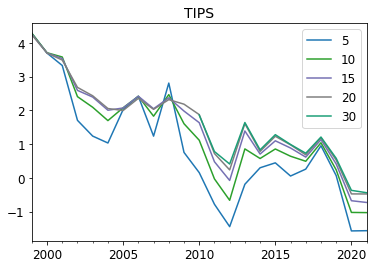

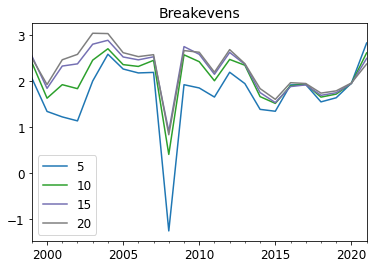

In [19]:
# sanity check
us_r.plot(title='TIPS'); plt.show();
us_be.plot(title='Breakevens'); plt.show();

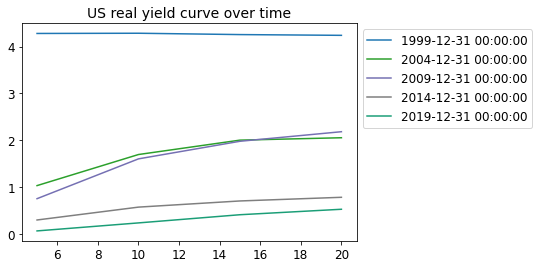

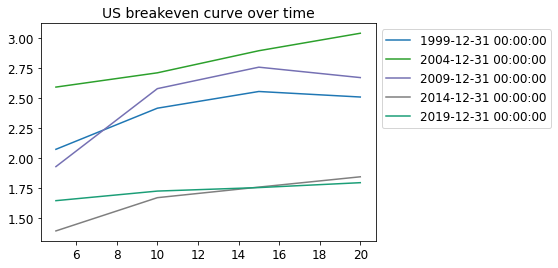

In [20]:
us_r.loc[::5].T.dropna().plot(title='US real yield curve over time'); plt.legend(bbox_to_anchor=[1,1]); plt.show();
us_be.loc[::5].T.dropna().plot(title='US breakeven curve over time'); plt.legend(bbox_to_anchor=[1,1]); plt.show();

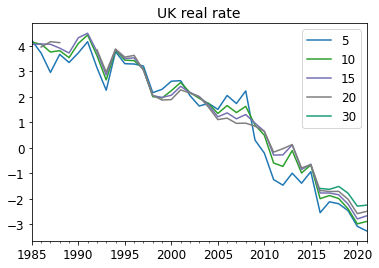

In [21]:
# sanity check
uk_r.plot(title='UK real rate'); plt.show();

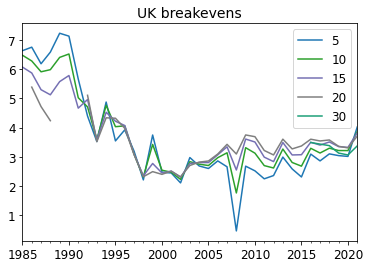

In [22]:
# sanity check
uk_be.plot(title='UK breakevens'); plt.show();

<AxesSubplot: title={'center': 'Real rate'}>

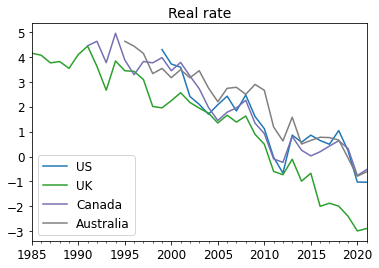

In [23]:
rs_by_horizon[10].plot(title='Real rate')

In [24]:
h = 10
df = rs_by_horizon[h]

pd.Series({k: df[k].dropna().index[0] for k in df}).sort_values()

UK          1985-12-31
Canada      1991-12-31
Australia   1995-12-31
US          1999-12-31
dtype: datetime64[ns]

# RGDP and CPI

In [25]:
rgdp = load_fred(keys=RGDP_FRED_KEYS, save_name='rgdp', reindex=True, save=SAVE, save_path=SAVE_PATH)
cpi = load_fred(keys=CPI_FRED_KEYS, save_name='cpi', reindex=True, save=SAVE, save_path=SAVE_PATH)

In [26]:
rgdp_us_historical, ngdp_us_historical, cpi_us_historical = load_us_historical_gdp(
    reindex=True, save=SAVE, save_path=SAVE_PATH
)

In [27]:
rgdp_uk_historical, ngdp_uk_historical, cpi_uk_historical = load_uk_historical_gdp(
    reindex=True, save=SAVE, save_path=SAVE_PATH
)

In [28]:
rgdp_historical = pd.DataFrame({
    'US': rgdp_us_historical,
    'UK': rgdp_uk_historical,
})
ngdp_historical = pd.DataFrame({
    'US': ngdp_us_historical,
    'UK': ngdp_uk_historical,
})
cpi_historical = pd.DataFrame({
    'US': cpi_us_historical,
    'UK': cpi_uk_historical,
})

In [29]:
rgdp_combo = combine_historical(rgdp, rgdp_historical, end=END,
                                save=SAVE, save_path=SAVE_PATH, save_name='rgdp_combo')
#ngdp_combo = combine_historical(ngdp, ngdp_historical, end='2020',
#                                save=SAVE, save_path=SAVE_PATH, save_name='rgdp_combo')
cpi_combo = combine_historical(cpi, cpi_historical, end=END,
                               save=SAVE, save_path=SAVE_PATH, save_name='cpi_combo')

In [30]:
rgdp_over_horizons = get_change_over_horizons(rgdp_combo)
cpi_over_horizons = get_change_over_horizons(cpi_combo)

In [31]:
inflation = cpi_combo.pct_change()

## Sanity check graphs

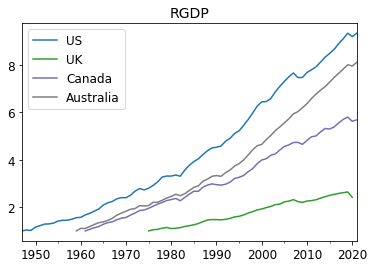

In [32]:
# sanity check
rgdp.plot(title='RGDP');

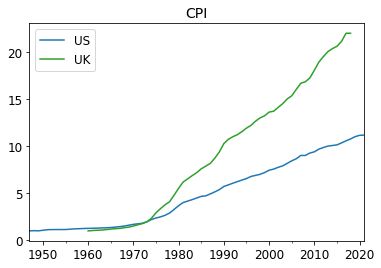

In [33]:
cpi.plot(title='CPI');

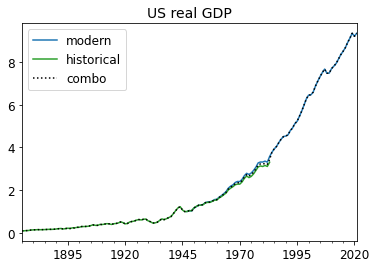

In [34]:
# sanity check
for country in rgdp_historical.dropna(axis=1, how='all'):
    start = rgdp[country].dropna().index[0]
    rgdp[country].plot(label='modern')
    (rgdp_historical[country]/rgdp_historical[country].loc[start]).plot(label='historical')
    rgdp_combo['US'].plot(color='k', linestyle=':', label='combo')
    plt.legend()
    plt.title(country + ' real GDP')
    plt.show();

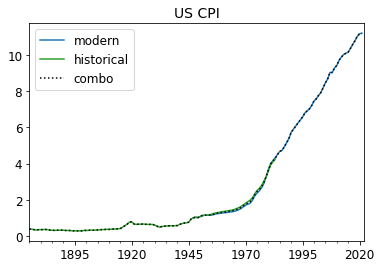

In [35]:
# sanity check
country = 'US'
start = cpi[country].dropna().index[0]
cpi[country].plot(label='modern')
(cpi_historical[country]/cpi_historical[country].loc[start]).plot(label='historical')
cpi_combo['US'].plot(color='k', linestyle=':', label='combo')
plt.legend()
plt.title(country + ' CPI')
plt.show();

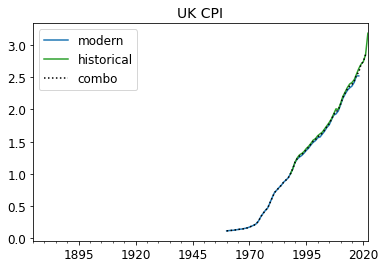

In [36]:
# sanity check
country = 'UK'
start = cpi_historical[country].dropna().index[0]
(cpi[country]/cpi[country].loc[start]).plot(label='modern')
cpi_historical[country].plot(label='historical')
cpi_combo['UK'].plot(color='k', linestyle=':', label='combo')
plt.legend()
plt.title(country + ' CPI')
plt.show();

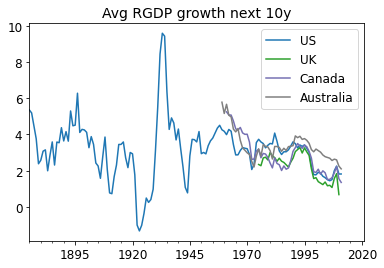

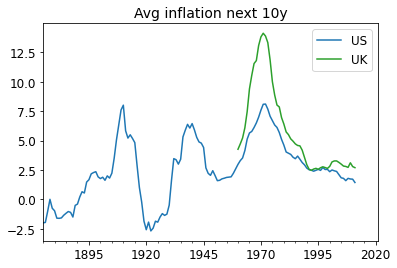

In [37]:
# sanity check
rgdp_over_horizons[10].plot(title='Avg RGDP growth next 10y'); plt.show();
cpi_over_horizons[10].plot(title='Avg inflation next 10y'); plt.show();

<AxesSubplot: title={'center': 'YoY inflation'}>

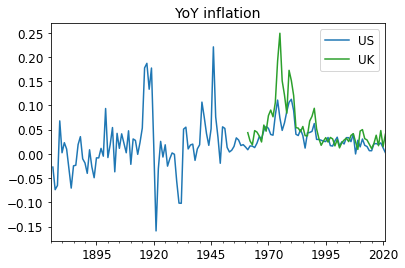

In [38]:
inflation.plot(title='YoY inflation')

# Historical AR(1) inflation "forecasts"

In [39]:
# unused
ar_forecasts, regss, paramss, bses = get_inflation_ar1(inflation, window=20)

## Sanity check graphs

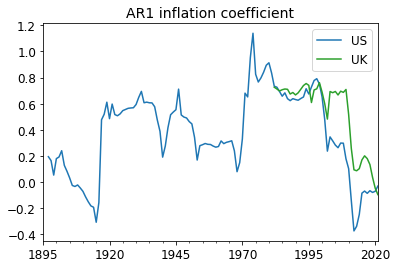

In [40]:
# sanity check -- also could cap this at 1 but why bother
paramss['US'].loc['lag_inflation'].plot(label='US')
paramss['UK'].loc['lag_inflation'].plot(label='UK', title='AR1 inflation coefficient')
plt.legend();

<AxesSubplot: title={'center': 'AR1 inflation forecast'}>

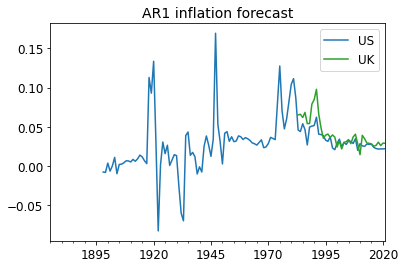

In [41]:
ar_forecasts.plot(title='AR1 inflation forecast')

# Just plotting breakevens

## By country

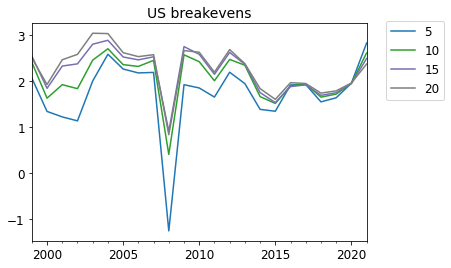

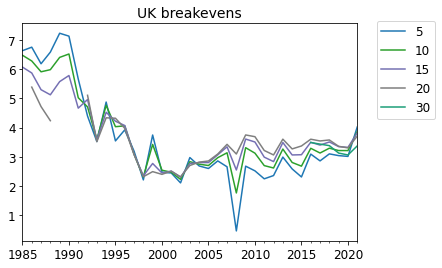

In [42]:
for country, r in bes.items():
    plot_df(r, title='{0} breakevens'.format(country), 
            save=SAVE, save_name=R_FIGS_SAVE_PATH+'{0}_all_horizons_ts.png'.format(country))

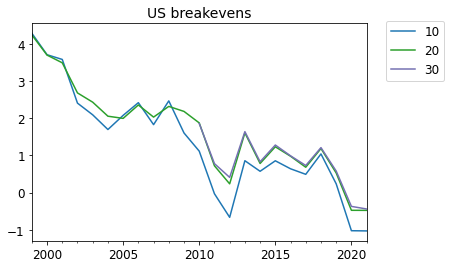

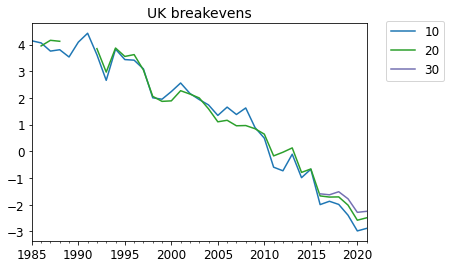

In [43]:
# 10-20-30
ten_twenty_thirty = [10, 20, 30]
for country, r in rs.items():
    tmp_horizons = [h for h in ten_twenty_thirty if h in r.columns]
    if tmp_horizons == ten_twenty_thirty:     # if you have all the data
        plot_df(r[tmp_horizons], title='{0} breakevens'.format(country), 
                save=False, save_name=R_FIGS_SAVE_PATH+'{0}_10_20_30.png'.format(country))

## By horizon

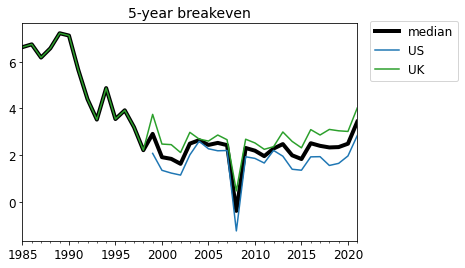

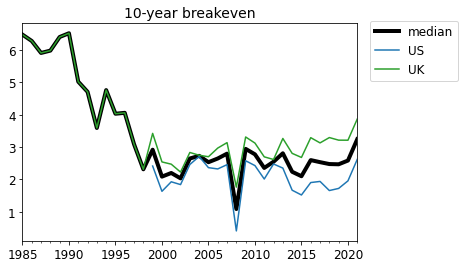

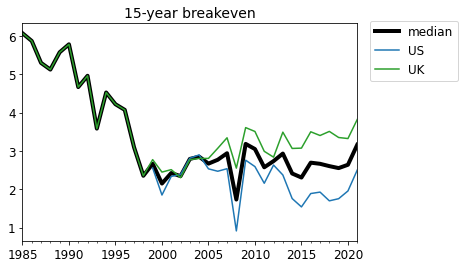

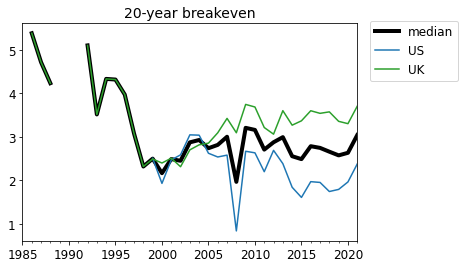

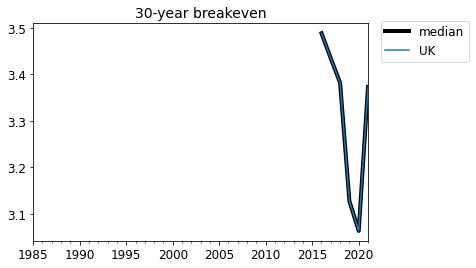

In [44]:
for h in bes_by_horizon:
    plot_df(
        bes_by_horizon[h], title='{0}-year breakeven'.format(h), 
        plot_median=True, bbox_to_anchor=[1.32, 1.04],
        save=SAVE, save_name=R_FIGS_SAVE_PATH+'be_by_horizon_{0}.png'.format(h)
    )

### 10y, monthly frequency, ad hoc graphs

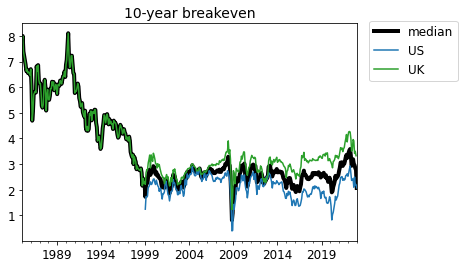

In [45]:
# 10y monthly
df = daily_bes_by_horizon[10].resample('M').last()
df = df[['US', 'UK']]

plot_df(
    df, title='10-year breakeven',
    plot_median=True, bbox_to_anchor=[1.32, 1.04],
    save=SAVE, save_name=R_FIGS_SAVE_PATH+'be_by_horizon_10_monthly.png'
)

In [46]:
df.max()

US    2.924400
UK    8.107107
dtype: float64

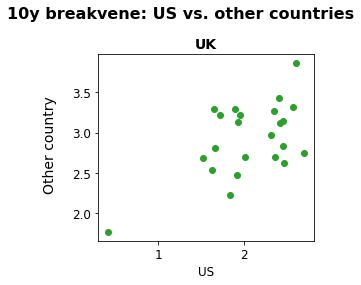

In [47]:
df = bes_by_horizon[10]

gs = gridspec.GridSpec(1, 1)
fig = plt.figure(figsize=(4,4))
axes = {'UK': (0,0)}

i = 1
for country in axes:
    g = gs[axes[country][0], axes[country][1]]
    ax = plt.subplot(g)
    ax.scatter(df['US'], df[country], color=colors[i])
    plt.xlabel('US')
    plt.title(country, weight='heavy')

    ax.xaxis.set_tick_params(labelsize=12)
    ax.yaxis.set_tick_params(labelsize=12)
    
    #ax.plot(plt.xlim(), plt.xlim(), linestyle='--', color='k', alpha=0.8,
    #        scalex=False, scaley=False, label='45-degree')
    
    i += 1
    
#fig.supxlabel('supxlabel', size=14)
fig.supylabel('Other country', size=14)
fig.suptitle('10y breakvene: US vs. other countries', size=16, weight='heavy')
fig.tight_layout()

if SAVE:
    plt.savefig(R_FIGS_SAVE_PATH+'correlation_10y.png', dpi=300, bbox_inches='tight')

## Scatter 10 vs. long

# Scatter BEs vs. inflation

In [48]:
supxlabels_bes = {'2x2 all': 'Breakeven over horizon',
'2x2 no5': 'Breakeven over horizon',
'1x3': 'Breakeven over horizon',
'10y': '10y breakeven',
'20y': '20y breakeven',
'5y': '5y breakeven',
'15y': '15y breakeven',
'30y': '30y breakeven'}

In [49]:
supylabels_bes = {'2x2 all': 'Inflation over horizon',
'2x2 no5': 'Inflation over horizon',
'1x3': 'Inflation over horizon',
'10y': 'Inflation next 10y',
'20y': 'Inflation next 20y',
'5y': 'Inflation next 5y',
'15y': 'Inflation next 15y',
'30y': 'Inflation next 30y'}

In [50]:
suptitles_bes = {'2x2 all': 'Breakeven vs. future inflation',
'2x2 no5': 'Breakeven vs. future inflation',
'1x3': 'Breakeven vs. future inflation',
'10y': '10y breakeven vs. inflation next 10 years',
'20y': '20y breakeven vs. inflation next 20 years',
'5y': '5y breakeven vs. inflation next 5 years',
'15y': '15y breakeven vs. inflation next 15 years',
'30y': '30y breakeven vs. inflation next 30 years'}

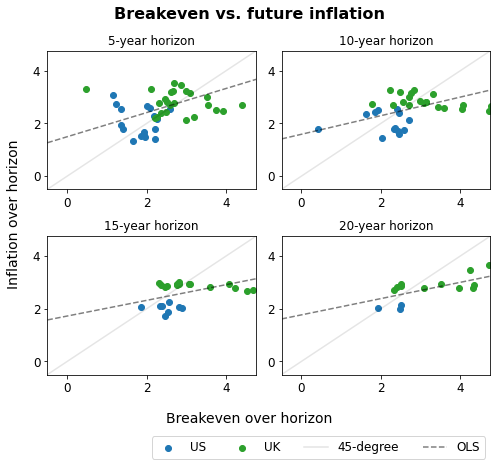

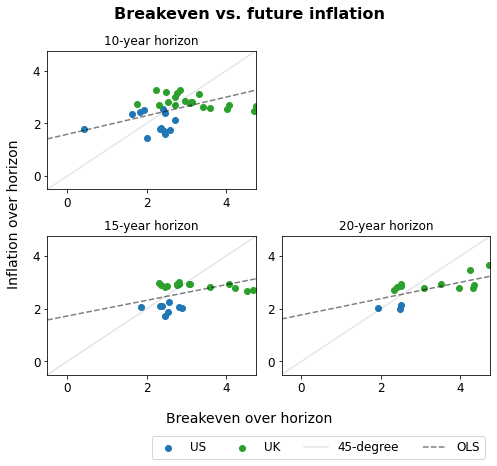

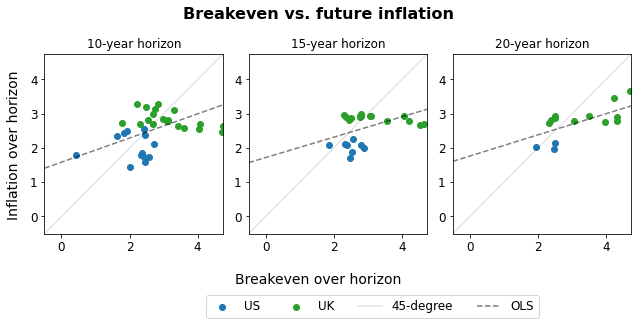

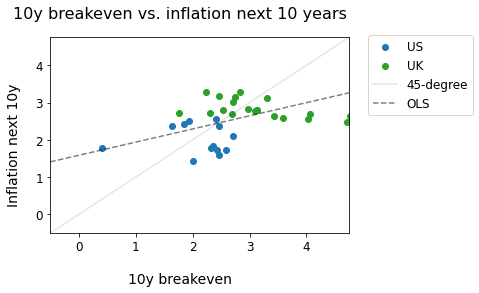

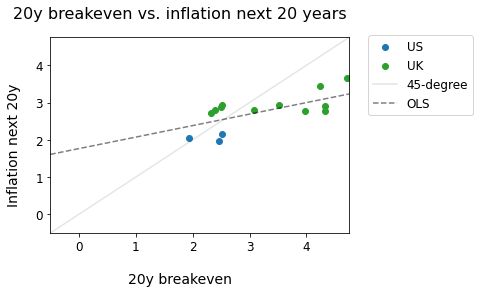

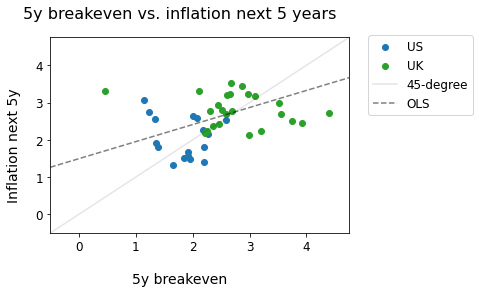

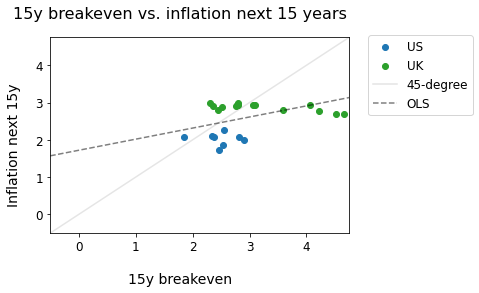

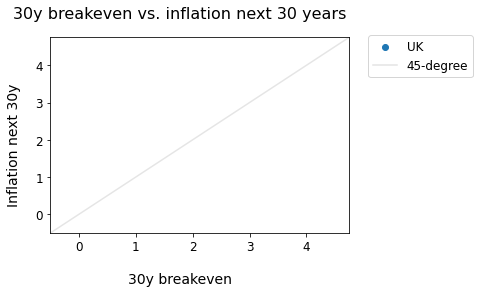

In [51]:
stackeds = {}
regs = {}
for config in horizon_maps:
    stackeds[config], regs[config] = scatter_r_vs_gdp(
        bes_by_horizon, cpi_over_horizons,
        dim=dims[config],
        figsize=figsizes[config],
        horizon_map=horizon_maps[config],
        bbox_to_anchor=btas[config],
        supxlabel=supxlabels_bes[config],
        supylabel=supylabels_bes[config],
        suptitle=suptitles_bes[config],
        titleweight=titleweights[config],
        subplot_titles=subplot_titless[config],
        legend_ncol=legend_ncols[config],
        fortyfive=True,
        save=SAVE, 
        save_name=R_FIGS_SAVE_PATH+'scatter_be_vs_pi_{0}.png'.format(save_names[config])
    )

# Predictions

In [52]:
# need to update text here

In [53]:
predictions_main(daily_bes_by_horizon, stackeds, regs, horizons=[5, 10, 20])

For horizon 5y, number of data points: 50


5y real yield, last daily available value:
US (2023-01-13): 2.11%
UK (2022-12-30): 3.243%


Equation to project g based on r:
y = 0.458x + 1.493


Projection for g over next 5y by country:
US    3.603100
UK    4.735826
dtype: float64


----------------------------------------------


For horizon 10y, number of data points: 40


10y real yield, last daily available value:
US (2023-01-13): 2.068%
UK (2022-12-30): 3.327%


Equation to project g based on r:
y = 0.353x + 1.586


Projection for g over next 10y by country:
US    3.654300
UK    4.912675
dtype: float64


----------------------------------------------


For horizon 20y, number of data points: 16


20y real yield, last daily available value:
US (2023-01-13): 2.223%
UK (2022-12-30): 3.515%


Equation to project g based on r:
y = 0.309x + 1.764


Projection for g over next 20y by country:
US    3.987200
UK    5.279173
dtype: float64


----------------------------------------------




# Timeseries real rates vs. GDP

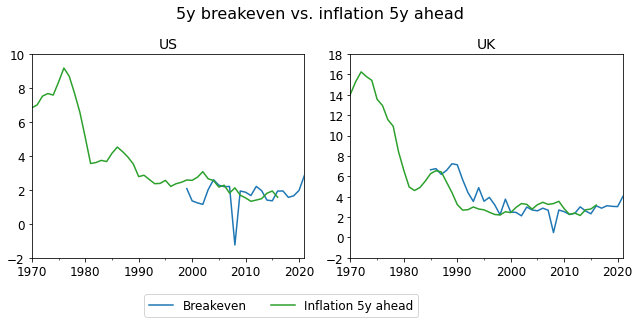

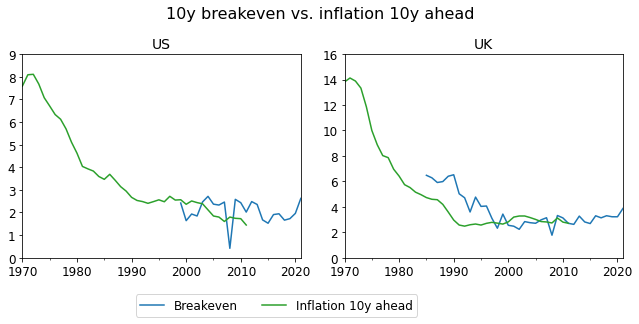

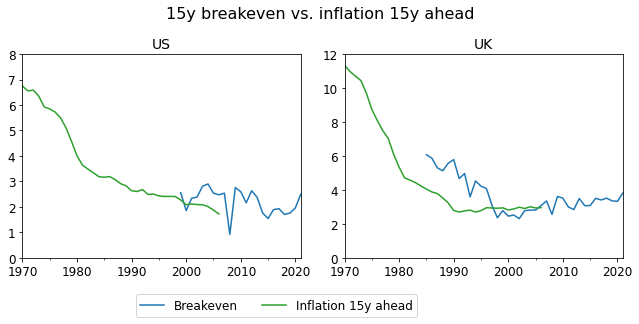

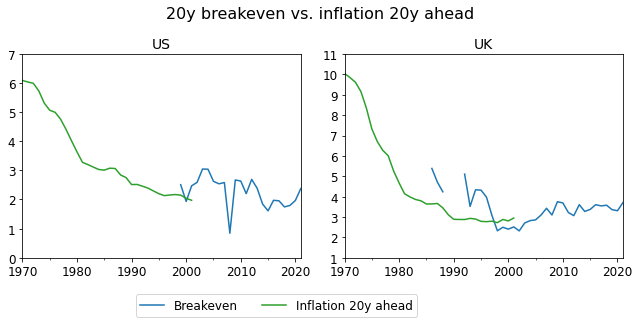

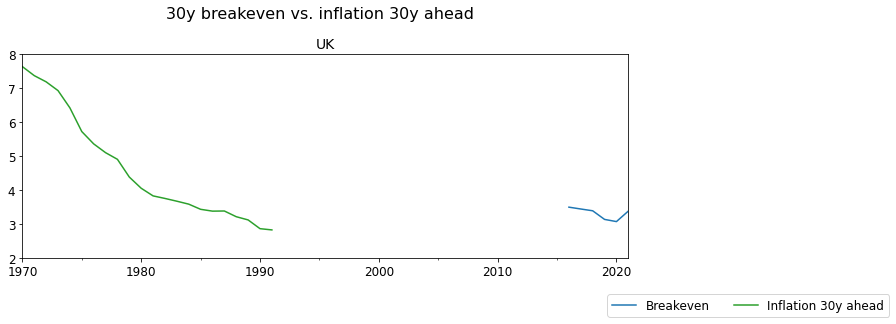

In [54]:
for h in rs_by_horizon:
    plot_r_vs_gdp(bes_by_horizon[h], cpi_over_horizons[h], h, 
                  bta=BTA_BY_NUMCOL[2], num_col=2,
                  var_str='Breakeven', outcome_base_str='Inflation {0}y ahead',
                  title_base_str='{0}y breakeven vs. inflation {0}y ahead',
                  save=SAVE, save_name=R_FIGS_SAVE_PATH+'ts_be_vs_pi_{0}.png'.format(h))